## Anderson Yoshizato PG AI&ML Cohort 10

## Project 2 - Income Qualification (New)

### DESCRIPTION

Identify the level of income qualification needed for the families in Latin America

Problem Statement Scenario:
Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB) believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

Following actions should be performed:
* Identify the output variable.
* Understand the type of data.
* Check if there are any biases in your dataset.
* Check whether all members of the house have the same poverty level.
* Check if there is a house without a family head.
* Set the poverty level of the members and the head of the house same in a family.
* Count how many null values are existing in columns.
* Remove null value rows of the target variable.
* Predict the accuracy using random forest classifier.
* Check the accuracy using a random forest with cross-validation.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((9557, 143), (23856, 142))

In [4]:
print(train.Target)

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64


In [5]:
# Checking data types
pd.options.display.max_rows = 150
print(train.dtypes)

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
pisomoscer           int64
pisocemento          int64
pisoother            int64
pisonatur            int64
pisonotiene          int64
pisomadera           int64
t

In [6]:
# Checking Categorical columns
train[['idhogar','dependency','edjefe','edjefa']]

,idhogar,dependency,edjefe,edjefa
0,21eb7fcc1,no,10,no
1,0e5d7a658,8,12,no
2,2c7317ea8,8,no,11
3,2b58d945f,yes,11,no
4,2b58d945f,yes,11,no
...,...,...,...,...
9552,d6c086aa3,.25,9,no
9553,d6c086aa3,.25,9,no
9554,d6c086aa3,.25,9,no
9555,d6c086aa3,.25,9,no


### Checking Bias
Target Values has a non uniform distribution

Target
1     755
2    1597
3    1209
4    5996
Name: Target, dtype: int64

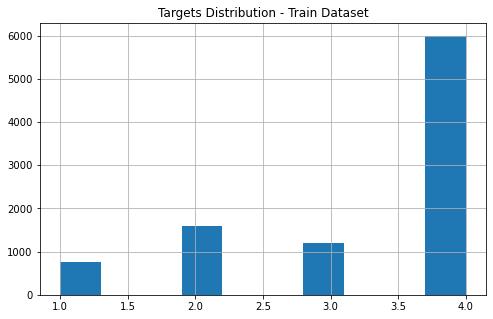

In [7]:
# Checking distribution of labels
# There is some bias in the dataset due to the amount of label 4 compared to other values
plt.figure(figsize = [8,5])
train.Target.hist()
plt.title('Targets Distribution - Train Dataset')
train.groupby(['Target']).Target.count()

In [8]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [9]:
train.Target.describe()

count    9557.000000
mean        3.302292
std         1.009565
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Target, dtype: float64

In [10]:
train.shape[0]

9557

### Checking the consistecy of the poverty level among the members of the house

In [11]:
ho_difpovlev = train[((train['idhogar'] == train['idhogar'].shift()) 
       & (train['Target'] != train['Target'].shift()))]
ho_difpovlev

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
283,ID_17d9dcd44,60000.0,0,3,0,1,0,0,NaN,0,...,1,49,9,0,4,9.000000,4.000000,25.000000,49,2
290,ID_606ed140f,NaN,0,3,0,1,1,0,NaN,0,...,81,256,36,0,16,9.000000,4.000000,182.250000,256,1
322,ID_dab0d86a2,160000.0,0,6,0,1,1,0,NaN,0,...,36,900,36,0,16,4.000000,4.000000,36.000000,900,1
323,ID_6e8c57bc1,160000.0,0,6,0,1,1,0,NaN,0,...,0,0,36,0,16,4.000000,4.000000,36.000000,0,2
410,ID_0f28c8bfa,180000.0,0,7,0,1,1,0,NaN,0,...,64,225,49,0,25,1.960000,6.250000,72.250000,225,2
412,ID_6895c3ee3,180000.0,0,7,0,1,1,0,NaN,0,...,36,2025,49,0,25,1.960000,6.250000,72.250000,2025,3
513,ID_be5ce5711,NaN,0,5,0,1,1,0,NaN,0,...,0,3844,25,0,4,2.777778,0.444444,18.777779,3844,3
604,ID_00a3edd2a,NaN,0,5,0,1,1,0,NaN,0,...,36,2116,16,36,4,1.777778,1.000000,81.000000,2116,3
970,ID_028c28215,150000.0,0,5,0,1,1,0,NaN,0,...,64,256,4,0,1,0.444444,1.000000,36.000000,256,3
1373,ID_457c88643,185000.0,0,4,0,1,1,0,NaN,0,...,169,441,9,0,1,2.250000,0.250000,272.250000,441,3


### Check houses without a family head

In [12]:
hhold_head = train['idhogar'][train['parentesco1'] ==1] #Household with Household Head

rows_nohead = train['idhogar'][train['parentesco1'] !=1] #Rows without Household Head

hhold_nohead = train['idhogar'][train['idhogar'].isin(rows_nohead) & ~train['idhogar'].isin(hhold_head)] #Household w/o Head
hhold_nohead

4935    09b195e7a
4975    896fe6d3e
5391    61c10e099
5396    374ca5a19
6443    bfd5067c2
6444    bfd5067c2
7086    1367ab31d
7438    6b1b2405f
7439    6b1b2405f
7440    6b1b2405f
7461    f2bfa75c4
7462    f2bfa75c4
7463    f2bfa75c4
7705    03c6bdf85
7706    03c6bdf85
7756    ad687ad89
7757    b1f4d89d7
8431    c0c8a5013
8432    c0c8a5013
8433    c0c8a5013
8636    a0812ef17
9489    d363d9183
9497    1bc617b23
Name: idhogar, dtype: object

### Set the poverty level of the members and the head of the house same in a family

In [13]:
# Getting the poverty level of the family head
polehead = ho_difpovlev[['idhogar','Target']][ho_difpovlev['parentesco1']==1]
polehead

,idhogar,Target
412,5c3f7725d,3
604,daafc1281,3
1374,bcaa2e2f5,4
1599,efd3aec61,2
1692,3c6973219,4
3250,a20ff33ba,2
3498,6bcf799cf,1
3989,d9b1558b5,1
4510,8bb6da3c1,3
4813,2cb443214,3


In [14]:
# Replacing the poverty level of the members
for i in polehead.index:
    for ix in train.index:
        if train.at[ix,'idhogar'] == polehead.at[i,'idhogar']:
            train.at[ix,'Target'] = polehead.at[i,'Target']
train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


### Count how many null values are existing in columns.

In [15]:
train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
paredother            0
pisomoscer            0
pisocemento           0
pisoother             0
pisonatur             0
pisonotiene           0
pisomadera            0
techozinc             0
techoentrepiso        0
techocane             0
techootro             0
cielorazo       

### Remove columns w/ high number of null values and other rows with null values (SQBmeaned).

In [16]:
# Selecting Columns that have more than 25% NaN values
isnull_rem = []
for cols in train.columns:
    if train[cols].isnull().sum() > 0.25*train.shape[0]:
        isnull_rem.append(cols)
isnull_rem

['v2a1', 'v18q1', 'rez_esc']

In [17]:
# Removing columns as per isnull_rem
train_1 = train.drop(axis=1, columns=isnull_rem)
train_1.reset_index(drop=True, inplace=True)

In [18]:
# Removing remaining rowsn with NaN values (SQBmeaned)
train_2 = train_1.dropna()
train_2.reset_index(drop=True, inplace=True)

In [19]:
# Checking the NaN values
train_2.isnull().sum()

Id                 0
hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
r4h1               0
r4h2               0
r4h3               0
r4m1               0
r4m2               0
r4m3               0
r4t1               0
r4t2               0
r4t3               0
tamhog             0
tamviv             0
escolari           0
hhsize             0
paredblolad        0
paredzocalo        0
paredpreb          0
pareddes           0
paredmad           0
paredzinc          0
paredfibras        0
paredother         0
pisomoscer         0
pisocemento        0
pisoother          0
pisonatur          0
pisonotiene        0
pisomadera         0
techozinc          0
techoentrepiso     0
techocane          0
techootro          0
cielorazo          0
abastaguadentro    0
abastaguafuera     0
abastaguano        0
public             0
planpri            0
noelec             0
coopele            0
sanitario1         0
sanitario2   

In [20]:
train_2 = train_2.drop(columns = ['Id','idhogar','dependency','edjefe','edjefa'])
train_2.shape

(9552, 135)

## Analysis using biased (full) dataset
### Predict the accuracy using random forest classifier in the biased (full) train dataset


In [21]:
X = train_2.iloc[:,:-1]
y = train_2.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7641, 134), (1911, 134), (7641,), (1911,))

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=14 , criterion='entropy', max_depth= 9, random_state = 10)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=14,
                       random_state=10)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rfc_pred_train = rfc.predict(X_train)

accuracy_train=accuracy_score(y_train,rfc_pred_train)
print(accuracy_train)

print(classification_report(y_train,rfc_pred_train))

0.8161235440387384
              precision    recall  f1-score   support

           1       0.99      0.57      0.72       629
           2       0.92      0.59      0.72      1249
           3       0.99      0.37      0.54       973
           4       0.78      1.00      0.88      4790

    accuracy                           0.82      7641
   macro avg       0.92      0.63      0.72      7641
weighted avg       0.85      0.82      0.80      7641



In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy=accuracy_score(y_test,rfc_pred)
print(accuracy)

print(classification_report(y_test,rfc_pred))

0.7650444793301936
              precision    recall  f1-score   support

           1       0.94      0.46      0.61       145
           2       0.86      0.44      0.58       328
           3       0.95      0.23      0.37       233
           4       0.74      0.99      0.85      1205

    accuracy                           0.77      1911
   macro avg       0.87      0.53      0.60      1911
weighted avg       0.80      0.77      0.73      1911



### Check the accuracy using a random forest with cross-validation.

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
# Applying Random Forest in all dataset
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(rfc, X, y, cv=5)
print(scores)

[0.65934066 0.63788592 0.64031414 0.56387435 0.59842932]


In [29]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.07)


### Prediciting Test dataset

In [30]:
# Removing columns as per isnull_rem from Test dataset
test_1 = test.drop(axis=1, columns=isnull_rem)
test_1.reset_index(drop=True, inplace=True)
test_1.shape

(23856, 139)

In [31]:
# Removing remaining rowsn with NaN values
test_2 = test_1.dropna()
test_2.reset_index(drop=True, inplace=True)

In [32]:
test_2 = test_2.drop(columns = ['Id','idhogar','dependency','edjefe','edjefa'])
test_2.shape

(23825, 134)

In [33]:
rfc_pred_test = rfc.predict(test_2)
outputs = pd.Series(rfc_pred_test)
outputs

0        4
1        4
2        4
3        4
4        4
        ..
23820    2
23821    4
23822    4
23823    4
23824    4
Length: 23825, dtype: int64

## Analysis using unbiased (filtered) dataset
### Addressing the Bias presented in the distribution of Target values

In [34]:
import random
import numpy as np

In [35]:
random.seed(10)

In [36]:
indx_1 = [i for i, x in enumerate(train_2.Target) if x == 1]
indx_2 = [i for i, x in enumerate(train_2.Target) if x == 2]
indx_3 = [i for i, x in enumerate(train_2.Target) if x == 3]
indx_4 = [i for i, x in enumerate(train_2.Target) if x == 4]

In [37]:
list_rem_4 = random.sample(indx_4, (len(indx_4) - len(indx_1)))
list_rem_3 = random.sample(indx_3, (len(indx_3) - len(indx_1)))
list_rem_2 = random.sample(indx_2, (len(indx_2) - len(indx_1)))
list_rem = (list_rem_2 + list_rem_3 + list_rem_4)
list_rem.sort()
list_rem = np.array(list_rem).T
list_rem

array([   0,    1,    2, ..., 9548, 9549, 9550])

In [38]:
train_3 = train_2.drop(list_rem, axis=0)

Target
1    774
2    774
3    774
4    774
Name: Target, dtype: int64

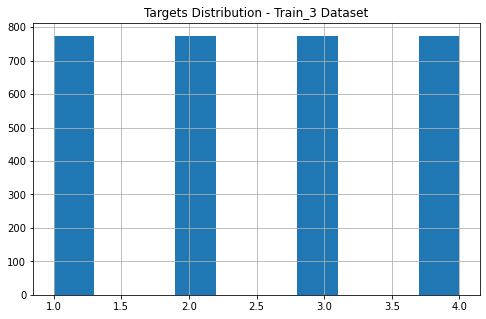

In [39]:
plt.figure(figsize = [8,5])
train_3.Target.hist()
plt.title('Targets Distribution - Train_3 Dataset')
train_3.groupby(['Target']).Target.count()

### Predict the accuracy using random forest classifier using unbiased dataset

In [40]:
train_3

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
7,1,2,0,1,1,0,0,1,1,2,...,0,49,16,81,4,16.000000,1.000000,100.0000,49,4
16,1,2,0,1,1,0,0,2,2,0,...,4,4900,16,0,4,16.000000,9.000000,289.0000,4900,4
19,0,4,0,1,1,0,0,1,1,0,...,144,484,4,225,0,1.000000,0.000000,182.2500,484,4
32,0,5,0,1,1,0,0,4,4,0,...,1,784,25,121,1,2.777778,0.062500,27.5625,784,4
34,0,5,0,1,1,0,0,4,4,0,...,36,900,25,121,1,2.777778,0.062500,27.5625,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,3,0,0,0,0,2,2,4,0,...,0,4,25,4,9,6.250000,2.250000,16.0000,4,2
9539,0,3,0,0,0,0,2,2,4,0,...,36,1089,25,4,9,6.250000,2.250000,16.0000,1089,2
9540,0,5,0,1,1,0,1,2,3,0,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9547,0,6,0,1,1,0,0,2,2,1,...,81,2116,25,81,1,1.562500,0.062500,68.0625,2116,2


In [41]:
Xu = train_3.iloc[:,:-1]
yu = train_3.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split
Xu_train, Xu_test, yu_train, yu_test = train_test_split(Xu, yu, test_size=0.20,  random_state = 10)
Xu_train.shape, Xu_test.shape, yu_train.shape, yu_test.shape

((2476, 134), (620, 134), (2476,), (620,))

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcu = RandomForestClassifier(n_estimators=14 , criterion='entropy', max_depth= 12, random_state = 10)
rfcu.fit(Xu_train, yu_train)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=14,
                       random_state=10)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rfcu_pred_train = rfcu.predict(Xu_train)

accuracyu_train=accuracy_score(yu_train,rfcu_pred_train)
print(accuracyu_train)

print(classification_report(yu_train,rfcu_pred_train))

0.968497576736672
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       620
           2       0.98      0.96      0.97       611
           3       0.95      0.98      0.96       616
           4       0.96      0.96      0.96       629

    accuracy                           0.97      2476
   macro avg       0.97      0.97      0.97      2476
weighted avg       0.97      0.97      0.97      2476



In [45]:
rfcu_pred = rfcu.predict(Xu_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracyu=accuracy_score(yu_test,rfcu_pred)
print(accuracyu)

print(classification_report(yu_test,rfcu_pred))

0.7322580645161291
              precision    recall  f1-score   support

           1       0.81      0.82      0.82       154
           2       0.75      0.66      0.70       163
           3       0.66      0.75      0.70       158
           4       0.72      0.70      0.71       145

    accuracy                           0.73       620
   macro avg       0.73      0.73      0.73       620
weighted avg       0.73      0.73      0.73       620



### Check the accuracy using a random forest with cross-validation.

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# Applying Random Forest in all dataset
from sklearn.ensemble import RandomForestClassifier

scoresu = cross_val_score(rfcu, Xu, yu, cv=5)
print(scoresu)

print('Accuracy: %0.2f (+/- %0.2f)' % (scoresu.mean(), scoresu.std() * 2))

[0.43709677 0.40549273 0.39095315 0.3812601  0.39741519]
Accuracy: 0.40 (+/- 0.04)


### Prediciting Test dataset

In [49]:
# Removing columns as per isnull_rem from Test dataset
test_1 = test.drop(axis=1, columns=isnull_rem)
test_1.reset_index(drop=True, inplace=True)
test_1.shape

(23856, 139)

In [50]:
# Removing remaining rowsn with NaN values
test_2 = test_1.dropna()
test_2.reset_index(drop=True, inplace=True)

test_2 = test_2.drop(columns = ['Id','idhogar','dependency','edjefe','edjefa'])
test_2.shape

(23825, 134)

In [51]:
rfcu_pred_test = rfcu.predict(test_2)
outputsu = pd.Series(rfcu_pred_test)
outputsu

0        4
1        4
2        4
3        4
4        4
        ..
23820    2
23821    3
23822    3
23823    3
23824    3
Length: 23825, dtype: int64

#### The analysis was performed considering the FULL dataset (biased) and a derived dataset with even quantity of target values (unbiased). 
#### The accuracies calculated based on simple split train/test dataset and on crossvalidation indicate that the model computed using the FULL dataset has a better performance of its predictor.